In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [28]:
pd.read_csv('./datasets/russia site/cleaned/aapl.csv').head()

,ticker,date,time,price,vol,date_time
0,aapl,20190903,93001,206.21,200,2019-09-03 09:30:01
1,aapl,20190903,93001,206.20,200,2019-09-03 09:30:01
2,aapl,20190903,93001,206.12,100,2019-09-03 09:30:01
3,aapl,20190903,93001,206.29,100,2019-09-03 09:30:01
4,aapl,20190903,93001,206.29,100,2019-09-03 09:30:01


In [30]:
# Trades by company
directory = './datasets/russia site/cleaned/'
files = [file for file in os.listdir(directory) if file.endswith('.csv')]
trade_count = []
for file in files:
    df = pd.read_csv(directory + file, index_col='date_time', parse_dates=True)
    df.sort_index(inplace=True)
    ticker = df['ticker'][0]
    trade_count.append({
        'company' : ticker,
        'num_trades' : df.shape[0],
        'total_vol' : df['vol'].sum()
    })
cnt_df = pd.DataFrame(trade_count)
cnt_df.head()

,company,num_trades,total_vol
0,csco,529731,89348320
1,ba,163959,18700457
2,v,229903,29970593
3,wba,172138,24256659
4,utx,102566,12902522


In [5]:
# Tweets by company
# Avg sentiment by company
directory = './datasets/twitters/withsent/'
files = [file for file in os.listdir(directory) if file.endswith('.csv')]
tweet_stats = []
for file in files:
    df = pd.read_csv(directory + file, index_col='date', parse_dates=True)
    df.sort_index(inplace=True)
    ticker = df['company'][0]
    tweet_stats.append({
        'company' : ticker,
        'number' : df.shape[0],
        'avg_sent' : df['vader_sentiment'].mean()
    })
tweet_stat_df = pd.DataFrame(tweet_stats)
    

In [6]:
tweet_stat_df

,company,number,avg_sent
0,csco,6427,0.174888
1,ba,32647,0.060862
2,v,6915,0.135043
3,wba,3438,0.116368
4,utx,2301,0.178722
5,mrk,6170,0.121838
6,pg,4641,0.162586
7,cat,9469,0.113459
8,mcd,10556,0.094593
9,intc,10119,0.134759


In [24]:
# Target counts for each company
directory = './raw_data/New Folder With Items/min/'
files = [file for file in os.listdir(directory) if file.endswith('.csv')]
all_stats = []
for file in files:
    df = pd.read_csv(directory + file, index_col='date_time', parse_dates=True)
    df.sort_index(inplace=True)
    df['target'] = np.where(df['mean_px_1'] > 0, 2,
                           np.where(df['mean_px_1'] < 0, 0, 1))
    ticker = df['ticker'][0]
    tgt_counts = df['target'].value_counts()
    tgt_percs = df['target'].value_counts(normalize=True)
    all_stats.append({
        'company' : ticker,
        'size' : df.shape[0],
        'no_trade_periods' : df[df['vol'] == 0].shape[0],
        'avg_sent' : df['sent_mean'].mean(),
        'down' : tgt_counts[0],
        'flat' : tgt_counts[1],
        'up' : tgt_counts[2],
        'down_per' : tgt_percs[0],
        'flat_per' : tgt_percs[1],
        'up_per' : tgt_percs[2]
    })
min_stats = pd.DataFrame(all_stats)
min_stats.head()

,company,size,no_trade_periods,avg_sent,down,flat,up,down_per,flat_per,up_per
0,csco,33625,4880,0.190102,14011,5520,14094,0.416684,0.164164,0.419152
1,ba,33625,7873,0.079782,12919,8016,12690,0.384208,0.238394,0.377398
2,v,33625,4877,0.159254,14180,5182,14263,0.421710,0.154112,0.424178
3,wba,33625,6763,0.109933,13000,7661,12964,0.386617,0.227836,0.385546
4,utx,33625,9464,0.130455,11694,10080,11851,0.347777,0.299777,0.352446


In [26]:
# Target counts for each company
directory = './raw_data/New Folder With Items/sec/'
files = [file for file in os.listdir(directory) if file.endswith('.csv')]
all_stats = []
for file in files:
    df = pd.read_csv(directory + file, index_col='date_time', parse_dates=True)
    df.sort_index(inplace=True)
    df['target'] = np.where(df['mean_px_1'] > 0, 2,
                           np.where(df['mean_px_1'] < 0, 0, 1))
    ticker = df['ticker'][0]
    tgt_counts = df['target'].value_counts()
    tgt_percs = df['target'].value_counts(normalize=True)
    all_stats.append({
        'company' : ticker,
        'size' : df.shape[0],
        'no_trade_periods' : df[df['vol'] == 0].shape[0],
        'avg_sent' : df['sent_mean'].mean(),
        'down' : tgt_counts[0],
        'flat' : tgt_counts[1],
        'up' : tgt_counts[2],
        'down_per' : tgt_percs[0],
        'flat_per' : tgt_percs[1],
        'up_per' : tgt_percs[2]
    })
sec_stats = pd.DataFrame(all_stats)
sec_stats.head()

,company,size,no_trade_periods,avg_sent,down,flat,up,down_per,flat_per,up_per
0,csco,2012485,1841067,0.188435,58583,1895424,58478,0.029110,0.941833,0.029058
1,ba,2012471,1918407,0.070981,45108,1923168,44195,0.022414,0.955625,0.021961
2,v,2012483,1876016,0.135325,59320,1893803,59360,0.029476,0.941028,0.029496
3,wba,2012483,1919599,0.105105,36885,1938816,36782,0.018328,0.963395,0.018277
4,utx,2012485,1945301,0.150501,28692,1954450,29343,0.014257,0.971163,0.014580


In [10]:
df = pd.read_csv('./raw_data/New Folder With Items/min/ba.csv', index_col='date_time', parse_dates=True)
df.head()

,vol,price open,price high,price low,price close,mean_price,sent_mean,high_px_1,mean_px_1,high_px_2,...,mean_px_5,high_px_10,mean_px_10,high_px_15,mean_px_15,high_px_30,mean_px_30,high_px_60,mean_px_60,ticker
date_time,,,,,,,,,,,,,,,,,,,,,
2019-09-03 09:30:00,2800,353.875,354.43,353.65,353.92,353.976607,0.080583,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ba
2019-09-03 09:31:00,2574,354.020,354.02,352.22,352.44,353.123125,0.080583,-0.001157,-0.002411,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ba
2019-09-03 09:32:00,3500,351.540,351.69,350.74,351.41,351.274531,0.104387,-0.006582,-0.005235,-0.007731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ba
2019-09-03 09:33:00,1400,351.650,352.90,351.42,352.90,352.047143,0.083866,0.003441,0.002199,-0.003164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ba
2019-09-03 09:34:00,600,352.790,352.79,352.22,352.78,352.631667,0.083866,-0.000312,0.001660,0.003128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ba


In [11]:
df['target'] = np.where(df['mean_px_1'] > 0, 2,
                           np.where(df['mean_px_1'] < 0, 0, 1))

In [18]:
df['target'].value_counts(normalize=True)

0    0.384208
2    0.377398
1    0.238394
Name: target, dtype: float64

In [22]:
df[df['vol'] != 0].shape[0

25752

In [32]:
df

,ticker,date,time,price,vol
date_time,,,,,
2019-09-03 09:30:05,jnj,20190903,93005,127.85,100
2019-09-03 09:30:12,jnj,20190903,93012,127.73,100
2019-09-03 09:30:13,jnj,20190903,93013,127.85,100
2019-09-03 09:30:13,jnj,20190903,93013,127.86,100
2019-09-03 09:30:13,jnj,20190903,93013,127.91,100
...,...,...,...,...,...
2019-12-31 15:59:57,jnj,20191231,155957,145.89,103
2019-12-31 15:59:58,jnj,20191231,155958,145.89,100
2019-12-31 15:59:58,jnj,20191231,155958,145.88,103


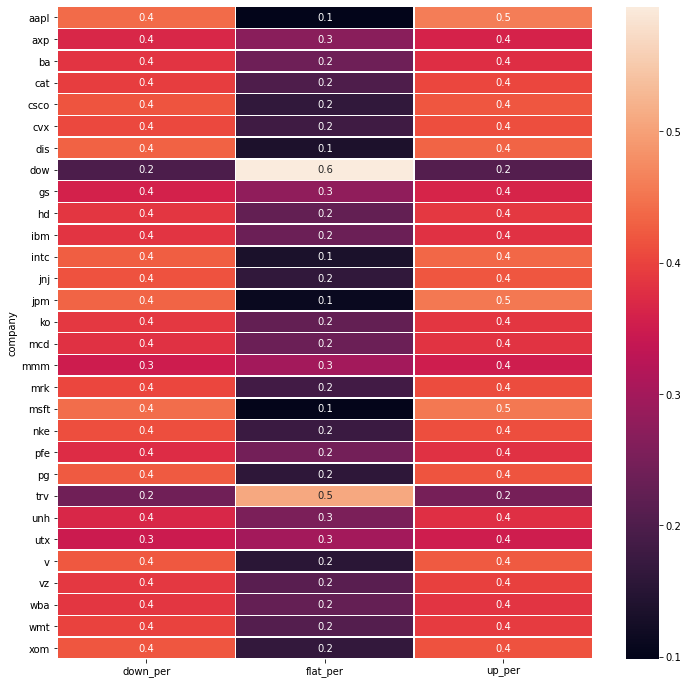

In [74]:
ss = min_stats.set_index('company')

ss = ss[['down_per', 'flat_per', 'up_per']]
ss.sort_index(inplace=True)
plt.figure(figsize=(12,12))
sns.heatmap(ss, annot=True, linewidths=.5, annot_kws={'size': 10}, fmt='.1')

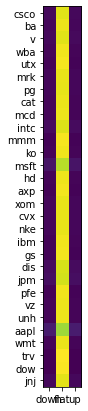

In [53]:
plt.figure(figsize=(20,7))
im = plt.imshow(ss, interpolation='nearest')
plt.xticks(np.arange(len(ss.columns)), ss.columns)
plt.yticks(np.arange(len(ss)), ss.index)

# ax.set_xticklabels(['down', 'flat', 'up'])
# ax.set_yticklabels(ss.index)

plt.show()

In [76]:
tweet_stat_df.describe()

,number,avg_sent
count,31.000000,31.000000
mean,11149.354839,0.127478
std,15204.475033,0.030968
min,1321.000000,0.060862
25%,4358.500000,0.107330
50%,6427.000000,0.128371
75%,10076.500000,0.144366
max,81967.000000,0.195361


In [77]:
tweet_stat_df.sort_values('number')

,company,number,avg_sent
28,trv,1321,0.090839
13,rtn,2007,0.122015
4,utx,2301,0.178722
15,axp,2761,0.136665
3,wba,3438,0.116368
17,cvx,4149,0.094647
11,ko,4250,0.127249
10,mmm,4260,0.075170
29,dow,4457,0.082345
6,pg,4641,0.162586


In [78]:
cnt_df.describe()

,num_trades,total_vol
count,30.00000,3.000000e+01
mean,255969.50000,3.703309e+07
std,187060.37987,3.004472e+07
min,45818.00000,4.791868e+06
25%,141925.50000,1.705858e+07
50%,202086.00000,2.667005e+07
75%,287399.75000,4.639917e+07
max,779963.00000,1.149754e+08


In [79]:
cnt_df.sort_values('num_trades')

,company,num_trades,total_vol
27,trv,45818,4791868
28,dow,51048,6247723
10,mmm,101162,11102504
4,utx,102566,12902522
19,gs,109171,12410174
14,axp,113998,14838828
18,ibm,138904,15912645
8,mcd,141648,16949504
24,unh,142758,17385820
13,hd,152153,17452671


In [90]:
min_stats['size'].describe()

count    3.000000e+01
mean     2.011991e+06
std      2.630570e+03
min      1.998064e+06
25%      2.012475e+06
50%      2.012480e+06
75%      2.012484e+06
max      2.012485e+06
Name: size, dtype: float64

In [91]:
min_stats.sort_values('down_per')

,company,size,no_trade_periods,avg_sent,down,flat,up,down_per,flat_per,up_per
28,dow,33385,19237,0.108776,6589,19867,6929,0.197364,0.595088,0.207548
27,trv,33625,16507,0.125578,8130,17103,8392,0.241784,0.508639,0.249576
4,utx,33625,9464,0.130455,11694,10080,11851,0.347777,0.299777,0.352446
10,mmm,33625,9648,0.094515,11747,10055,11823,0.349353,0.299033,0.351613
19,gs,33625,9030,0.183981,12069,9348,12208,0.358929,0.278007,0.363063
24,unh,33625,8361,0.151478,12363,8550,12712,0.367673,0.254275,0.378052
14,axp,33624,8324,0.188075,12371,9088,12165,0.367922,0.270283,0.361795
22,pfe,33625,6839,0.180704,12598,8256,12771,0.374662,0.245532,0.379807
8,mcd,33625,7473,0.121981,12798,7935,12892,0.380610,0.235985,0.383405
18,ibm,33625,7260,0.132045,12913,7898,12814,0.384030,0.234885,0.381086


In [88]:
sec_stats.sort_values('flat_per')

,company,size,no_trade_periods,avg_sent,down,flat,up,down_per,flat_per,up_per
25,aapl,2012484,1649095,0.127969,160214,1691266,161004,0.079610,0.840387,0.080003
12,msft,2012485,1717470,0.163456,119648,1774341,118496,0.059453,0.881667,0.058880
21,jpm,2012479,1799607,0.129200,83602,1844581,84296,0.041542,0.916572,0.041887
20,dis,2012480,1836892,0.123646,74048,1863996,74436,0.036794,0.926218,0.036987
9,intc,2012484,1814768,0.129410,67947,1875816,68721,0.033763,0.932090,0.034147
2,v,2012483,1876016,0.135325,59320,1893803,59360,0.029476,0.941028,0.029496
0,csco,2012485,1841067,0.188435,58583,1895424,58478,0.029110,0.941833,0.029058
29,jnj,2012479,1879112,0.114484,54283,1903495,54701,0.026973,0.945846,0.027181
6,pg,2012476,1884569,0.157676,51442,1911148,49886,0.025562,0.949650,0.024788
17,nke,2012484,1887951,0.116715,49856,1914320,48308,0.024773,0.951222,0.024004


In [89]:
sec_stats.sort_values('up_per')

,company,size,no_trade_periods,avg_sent,down,flat,up,down_per,flat_per,up_per
28,dow,1998064,1966119,0.089359,13180,1971094,13790,0.006596,0.986502,0.006902
27,trv,2012431,1979171,0.107060,14781,1982847,14803,0.007345,0.985299,0.007356
4,utx,2012485,1945301,0.150501,28692,1954450,29343,0.014257,0.971163,0.014580
10,mmm,2012479,1946286,0.071309,30177,1952466,29836,0.014995,0.970180,0.014825
14,axp,2012383,1936335,0.133833,31484,1950098,30801,0.015645,0.969049,0.015306
19,gs,2012474,1940821,0.171293,32542,1946615,33317,0.016170,0.967275,0.016555
22,pfe,2012479,1903009,0.153354,36033,1940281,36165,0.017905,0.964125,0.017970
18,ibm,2012479,1925206,0.113426,36093,1939988,36398,0.017935,0.963979,0.018086
3,wba,2012483,1919599,0.105105,36885,1938816,36782,0.018328,0.963395,0.018277
11,ko,2012483,1903486,0.122065,36792,1938716,36975,0.018282,0.963345,0.018373


In [92]:
sec_stats['no_trade'] = sec_stats['no_trade_periods'] / sec_stats['size']


In [93]:
sec_stats['no_trade'].describe()

count    30.000000
mean      0.938120
std       0.034753
min       0.819433
25%       0.934046
50%       0.945722
75%       0.956588
max       0.984012
Name: no_trade, dtype: float64

In [94]:
min_stats['no_trade'] = min_stats['no_trade_periods'] / min_stats['size']
min_stats['no_trade'].describe()


count    30.000000
mean      0.207027
std       0.103542
min       0.097546
25%       0.145257
50%       0.188089
75%       0.231167
max       0.576217
Name: no_trade, dtype: float64

In [95]:
sec_stats.sort_values('no_trade')

,company,size,no_trade_periods,avg_sent,down,flat,up,down_per,flat_per,up_per,no_trade
25,aapl,2012484,1649095,0.127969,160214,1691266,161004,0.079610,0.840387,0.080003,0.819433
12,msft,2012485,1717470,0.163456,119648,1774341,118496,0.059453,0.881667,0.058880,0.853408
21,jpm,2012479,1799607,0.129200,83602,1844581,84296,0.041542,0.916572,0.041887,0.894224
9,intc,2012484,1814768,0.129410,67947,1875816,68721,0.033763,0.932090,0.034147,0.901755
20,dis,2012480,1836892,0.123646,74048,1863996,74436,0.036794,0.926218,0.036987,0.912750
0,csco,2012485,1841067,0.188435,58583,1895424,58478,0.029110,0.941833,0.029058,0.914823
2,v,2012483,1876016,0.135325,59320,1893803,59360,0.029476,0.941028,0.029496,0.932190
29,jnj,2012479,1879112,0.114484,54283,1903495,54701,0.026973,0.945846,0.027181,0.933730
15,xom,2012475,1881655,0.106641,46727,1919362,46386,0.023219,0.953732,0.023049,0.934995
6,pg,2012476,1884569,0.157676,51442,1911148,49886,0.025562,0.949650,0.024788,0.936443
